In [6]:
using DSP, WAV
using Plots
using AbstractFFTs
using ChemometricsTools
using Shapefile
using Images, ImageMagick
using StatsBase
using Distances
using Statistics
using FFTW
using AbstractFFTs
using Distributions
using Random

┌ Info: Precompiling DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1278
┌ Info: Precompiling WAV [8149f6b0-98f6-5db9-b78f-408fbbb8ef88]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling ChemometricsTools [a9718f02-dbee-5ae5-ad0e-dfbd07fa387b]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

┌ Info: Precompiling Shapefile [8e980c4a-a4fe-5da2-b3a7-4b4b0353a2f4]
└ @ Base loading.jl:1278
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


In [39]:
relativePath_crowds = "./crowdSounds/"
fileWAVs_crowds = readdir(relativePath_crowds) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_crowds)

["07017020.wav", "07017033.wav", "07064037.wav", "07064052.wav", "07064058.wav", "07064059.wav", "07074149.wav"]


In [40]:
relativePath_crowds_test = "./crowdSoundsTest/"
fileWAVs_crowds_test = readdir(relativePath_crowds_test) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_crowds_test)

["07031051.wav", "07039089.wav"]


In [41]:
relativePath_mechanical = "./mechanicalSounds/"
fileWAVs_mechanical = readdir(relativePath_mechanical) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_mechanical)

["07007054.wav", "07011027.wav", "07011090.wav", "07066043.wav", "07070158.wav", "07070171.wav", "07071147.wav", "07075015.wav"]


In [42]:
relativePath_mechanical_test = "./mechanicalSoundsTest/"
fileWAVs_mechanical_test = readdir(relativePath_mechanical_test) |> files -> filter(file -> file[end-3:end] == ".wav" , files)
println(fileWAVs_mechanical_test)

["07027015.wav", "07039136.wav"]


In [43]:
crowd_signals = []
Fs_crowd = []
for filename in fileWAVs_crowds
    ss, Fs = wavread(relativePath_crowds*filename)
    push!(Fs_crowd,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(crowd_signals,ss[:,1])
end

In [44]:
crowd_signals_test = []
Fs_crowd_test = []
for filename in fileWAVs_crowds_test
    ss, Fs = wavread(relativePath_crowds_test*filename)
    push!(Fs_crowd_test,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(crowd_signals_test,ss[:,1])
end

In [45]:
mechanical_signals = []
Fs_mechanical = []
for filename in fileWAVs_mechanical
    ss, Fs = wavread(relativePath_mechanical*filename)
    push!(Fs_mechanical,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(mechanical_signals,ss[:,1])
end

In [46]:
mechanical_signals_test = []
Fs_mechanical_test = []
for filename in fileWAVs_mechanical_test
    ss, Fs = wavread(relativePath_mechanical_test*filename)
    push!(Fs_mechanical_test,Fs)
    #these signals come in 'stereo' so I just choose one channel
    push!(mechanical_signals_test,ss[:,1])
end

In [47]:
print(Fs_mechanical)

Any[44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0]

In [48]:
print(Fs_crowd)

Any[44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0, 44100.0f0]

In [49]:
print(Fs_mechanical_test)

Any[44100.0f0, 44100.0f0]

In [50]:
print(Fs_crowd_test)

Any[44100.0f0, 44100.0f0]

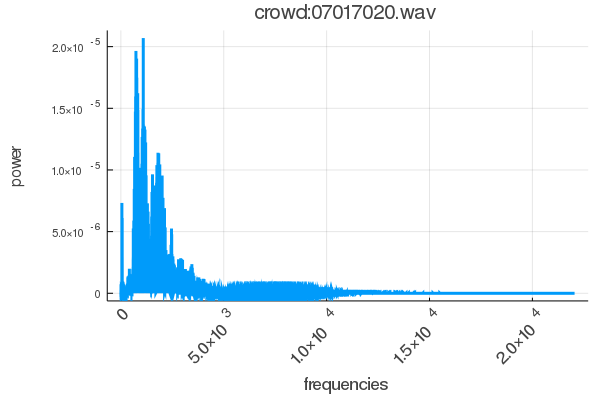

In [63]:
ss_ind = 1
prdgrm1 = DSP.Periodograms.periodogram(crowd_signals[ss_ind], fs=Int(Fs_crowd[ss_ind]), window=DSP.Windows.hamming)
p = plot(prdgrm1.freq,prdgrm1.power,legend=false,linewidth=3,xrotation=45,
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title="crowd:"*fileWAVs_crowds[ss_ind])
display("image/png", p)

In [64]:
length(prdgrm.power)

439041

In [65]:
length(prdgrm.freq)

439041

In [66]:
maximum(prdgrm.freq)

22050.0

In [75]:
prdgrm1.freq[1:100]

100-element Array{Float64,1}:
 0.0
 0.08861400462962964
 0.17722800925925927
 0.2658420138888889
 0.35445601851851855
 0.4430700231481482
 0.5316840277777778
 0.6202980324074074
 0.7089120370370371
 0.7975260416666667
 0.8861400462962964
 0.974754050925926
 1.0633680555555556
 ⋮
 7.798032407407408
 7.886646412037037
 7.975260416666667
 8.063874421296298
 8.152488425925927
 8.241102430555555
 8.329716435185185
 8.418330439814815
 8.506944444444445
 8.595558449074074
 8.684172453703704
 8.772786458333334

In [67]:
prdgrm.freq[1:10^4]

10000-element Array{Float64,1}:
   0.0
   0.05022321428571429
   0.10044642857142858
   0.15066964285714285
   0.20089285714285715
   0.25111607142857145
   0.3013392857142857
   0.3515625
   0.4017857142857143
   0.4520089285714286
   0.5022321428571429
   0.5524553571428572
   0.6026785714285714
   ⋮
 501.6294642857143
 501.6796875
 501.7299107142857
 501.78013392857144
 501.83035714285717
 501.8805803571429
 501.9308035714286
 501.9810267857143
 502.03125
 502.0814732142857
 502.13169642857144
 502.18191964285717

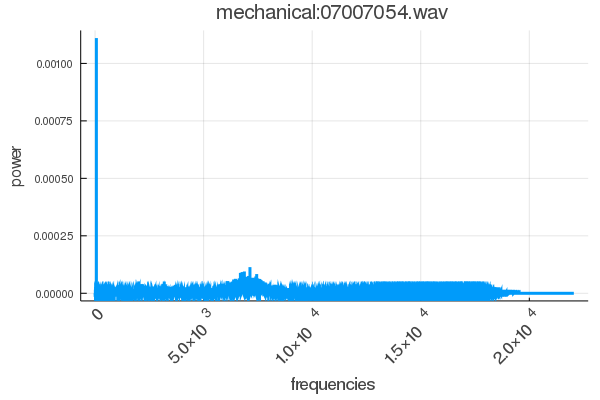

In [68]:
ss_ind = 1
prdgrm2 = DSP.Periodograms.periodogram(mechanical_signals[ss_ind], fs=Int(Fs_mechanical[ss_ind]), window=DSP.Windows.hamming)
p = plot(prdgrm2.freq,prdgrm2.power,legend=false,linewidth=3,xrotation=45,
        xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title="mechanical:"*fileWAVs_mechanical[ss_ind])
display("image/png", p)

In [69]:
length(prdgrm.power)

439041

In [70]:
maximum(prdgrm.freq)

22050.0

In [73]:
prdgrm2.freq[1:100]

100-element Array{Float64,1}:
 0.0
 0.05022321428571429
 0.10044642857142858
 0.15066964285714285
 0.20089285714285715
 0.25111607142857145
 0.3013392857142857
 0.3515625
 0.4017857142857143
 0.4520089285714286
 0.5022321428571429
 0.5524553571428572
 0.6026785714285714
 ⋮
 4.419642857142858
 4.469866071428571
 4.520089285714286
 4.5703125
 4.620535714285714
 4.670758928571429
 4.720982142857143
 4.771205357142858
 4.821428571428571
 4.871651785714286
 4.921875
 4.972098214285714

In [74]:
prdgrm2.freq[1:10^4]

10000-element Array{Float64,1}:
   0.0
   0.05022321428571429
   0.10044642857142858
   0.15066964285714285
   0.20089285714285715
   0.25111607142857145
   0.3013392857142857
   0.3515625
   0.4017857142857143
   0.4520089285714286
   0.5022321428571429
   0.5524553571428572
   0.6026785714285714
   ⋮
 501.6294642857143
 501.6796875
 501.7299107142857
 501.78013392857144
 501.83035714285717
 501.8805803571429
 501.9308035714286
 501.9810267857143
 502.03125
 502.0814732142857
 502.13169642857144
 502.18191964285717

## Cross entropy

We have 2 probability distributions $p$ and $q$ for the same *domain*. Here $p$ is the true distribution, and $q$ an approximation. In terms of information theory it measures the average (expected) number of bits to code one in terms of the other. In the discrete case it is

$H(p,q) = - \sum_{x \in domain} p(x) log(q(x))$

often we do not know $p(x)$ beforehand. This is related to the KL divergence measure (distance)

$D_{KL}(P||Q) = \sum_{x\in domain} P(x) log( \frac{P(x)}{Q(x)} )$



In [76]:
using Flux
using Flux:onehotbatch
using Flux:crossentropy,onecold,throttle
using Random
using Statistics:mean

In [79]:
Fs = Fs_mechanical_test[1]
max_freq = 10^4
function Get_Powers_freq10K(signal)
    prdgrm_tmp = DSP.Periodograms.periodogram(signal, fs=Int(Fs), window=DSP.Windows.hamming)
    return prdgrm_tmp.power[1:max_freq]
end

Get_Powers_freq10K (generic function with 1 method)

In [80]:
Get_Powers_freq10K(mechanical_signals[1])

10000-element Array{Float64,1}:
 3.448483900418463e-8
 1.2680126220753289e-8
 2.673400004458723e-12
 1.4488235860618455e-12
 4.4337905299333347e-13
 1.2261249299700209e-12
 8.14472808173038e-15
 4.914031060117449e-12
 4.570308652881908e-12
 2.562904734874422e-12
 8.216008332218507e-13
 6.065246746437203e-13
 2.7295090404808693e-12
 ⋮
 6.764429771370022e-7
 3.6341906518750435e-7
 1.621208557431288e-6
 1.4168597746279736e-6
 4.602295846498379e-7
 2.568282886276193e-7
 7.770494953959398e-7
 5.407834656899704e-7
 1.1615506923778553e-7
 1.9595001241153534e-8
 5.923283980230246e-8
 2.832348206438559e-7

In [ ]:
#make into a set of columns of arrays of floats (rows:dim of data by columns: number of samples)
X = 

In [ ]:
#use onehotbatch by providing it the labels (target value correct) and the range of targets it can take
y = 

In [ ]:
#create your model eg: model = Chain(  Dense(28*28,40, relu), Dense(40, 10), softmax)
model = 

In [ ]:
#define the loss function; eg: loss(X, y) = crossentropy(prediction value, target value) 
loss(X,y) =
#set the optimization function
opt = ADAM()

In [ ]:
#just a print out macro for the loss function we made
progress = () -> @show(loss(X, y))
using Flux:@epochs
@epochs 50 Flux.train!(loss, params(model),[(X,y)], opt, cb = throttle(progress, 10))

In [ ]:
#test the model on a test signal


In [ ]:
#use the test on a signal with function 'onecold' onecold( predicted_Y - 1)


In [ ]:
#make the accuracy function: accuracy(X, y) = mean(onecold(model(test data)) .== onecold(target data))


In [81]:
#run the accuracy
accuracy(X, y)

LoadError: [91mUndefVarError: accuracy not defined[39m